<a href="https://colab.research.google.com/github/Lloydster118/CW1-ML/blob/main/CW1_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [20]:
# data = pd.read_csv('diabetes.csv')
data = load_breast_cancer()

# Convert the Bunch object to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Now you can use info() and describe()
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

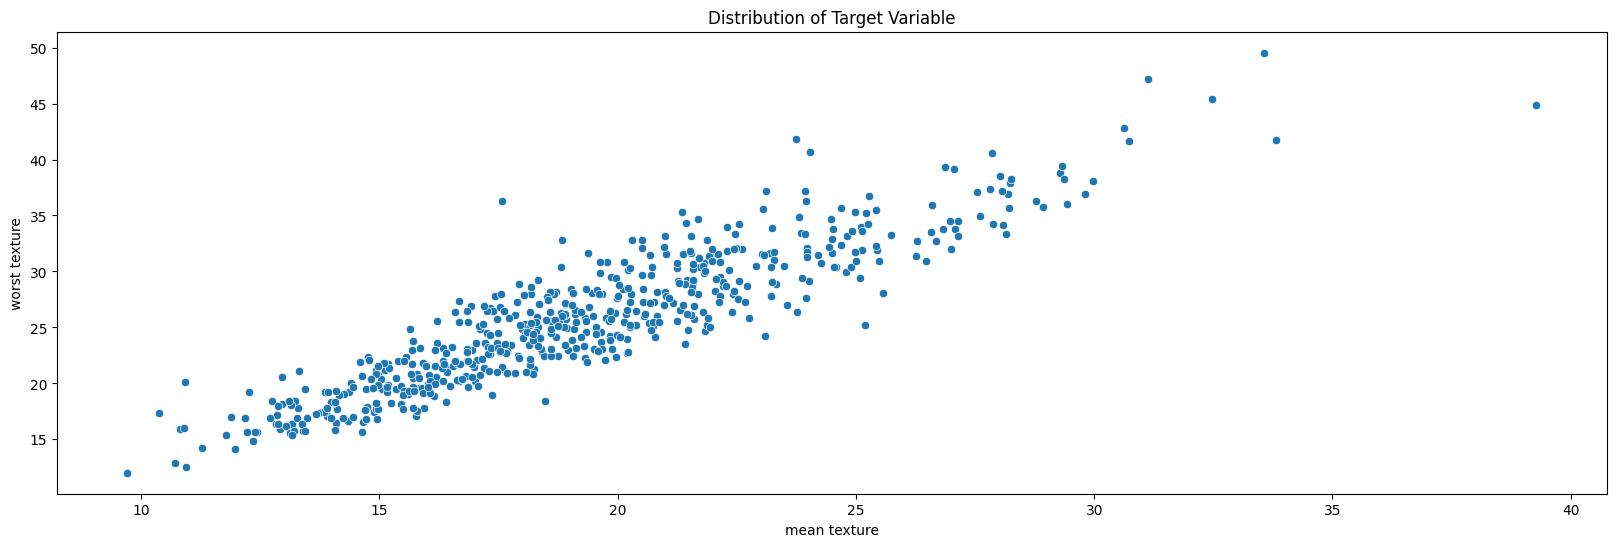

In [24]:
# Distribution of Target Variable
plt.figure(figsize=(20, 6))
sns.scatterplot(x='mean texture', y= 'worst texture', data=df) # it will produce error change the to column name
plt.title('Distribution of Target Variable')
plt.show()


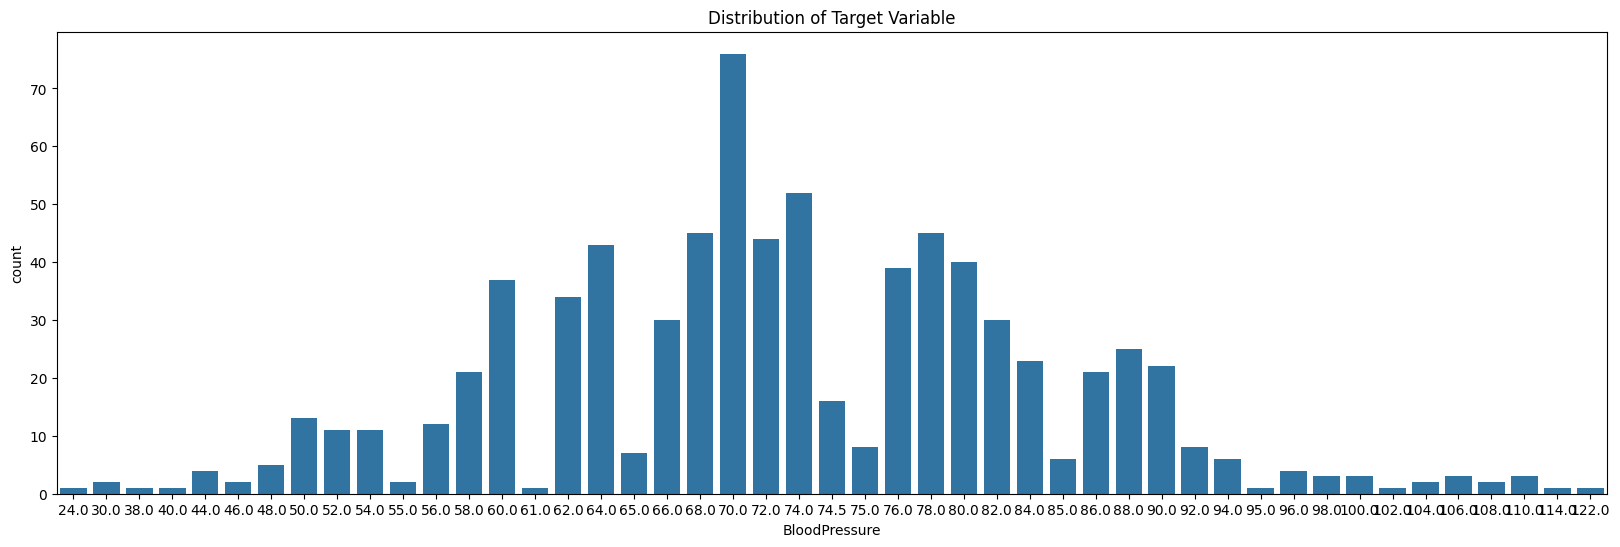

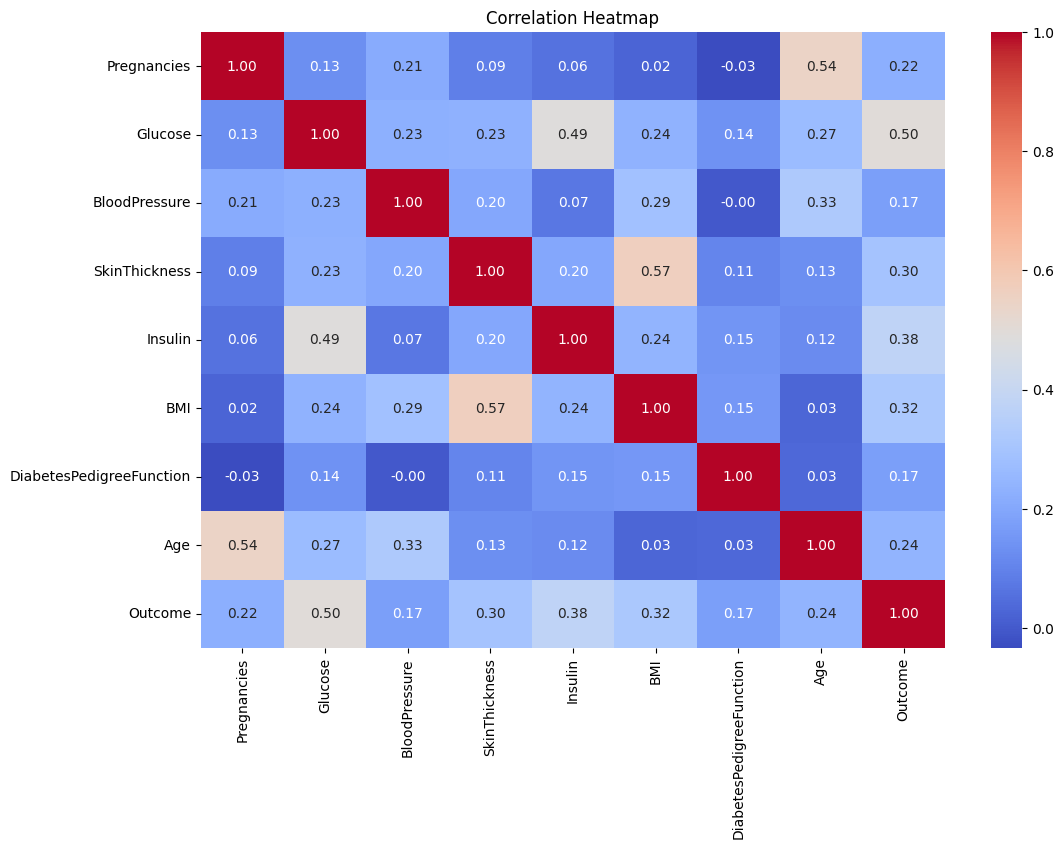

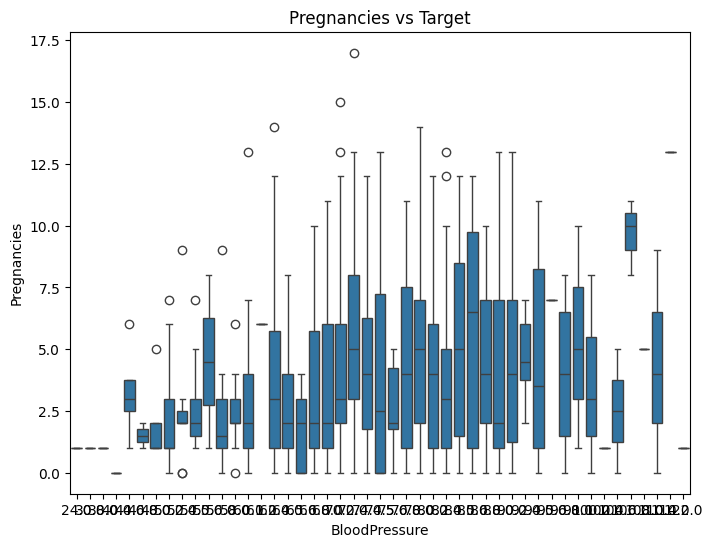

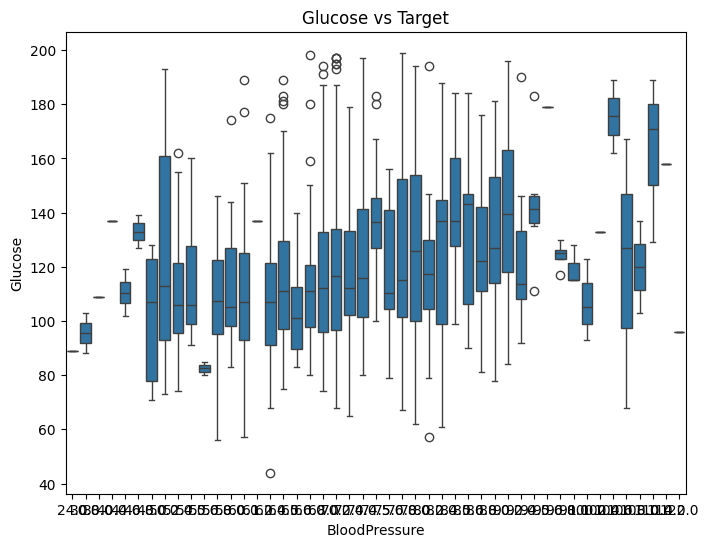

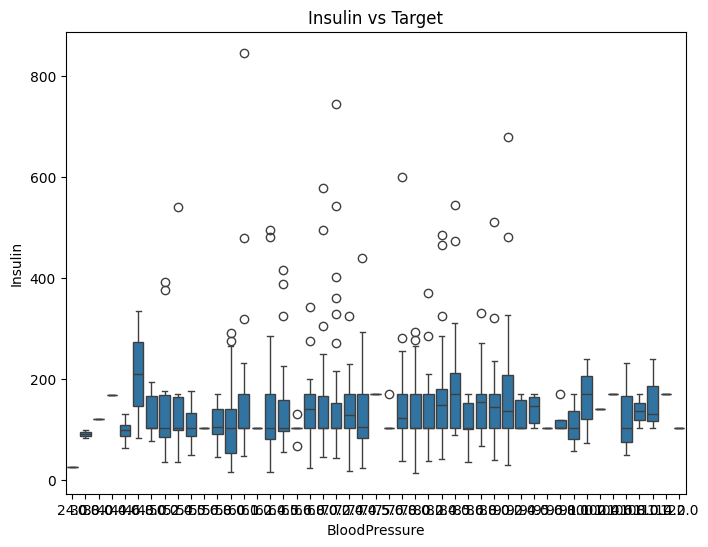

Initial f1 score: 0.5714285714285714
Classification Report:
               precision    recall  f1-score   support

          21       1.00      1.00      1.00        12
          22       1.00      1.00      1.00        13
          23       1.00      0.86      0.92         7
          24       0.91      1.00      0.95        10
          25       1.00      1.00      1.00         8
          26       0.50      1.00      0.67         3
          27       0.67      0.80      0.73         5
          28       0.60      0.67      0.63         9
          29       0.62      0.50      0.56        10
          30       0.33      0.50      0.40         4
          31       0.38      1.00      0.55         3
          32       1.00      0.25      0.40         4
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         2
          35       0.00      0.00      0.00         0
          36       0.40      0.50      0.44         4
          37       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

F1 Score: 0.5723688924605654
Tuned Model Accuracy: 0.5974025974025974
Classification Report (Tuned Model):
               precision    recall  f1-score   support

          21       1.00      1.00      1.00        12
          22       1.00      1.00      1.00        13
          23       1.00      1.00      1.00         7
          24       1.00      1.00      1.00        10
          25       0.89      1.00      0.94         8
          26       0.50      1.00      0.67         3
          27       0.67      0.80      0.73         5
          28       0.54      0.78      0.64         9
          29       0.71      0.50      0.59        10
          30       0.50      0.50      0.50         4
          31       0.38      1.00      0.55         3
          32       0.50      0.25      0.33         4
          33       0.00      0.00      0.00         2
          34       0.50      0.50      0.50         2
          36       0.67      0.50      0.57         4
          37       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [21]:
# Distribution of Target Variable
plt.figure(figsize=(20, 6))
# Check if 'target' is the correct column name, it might be 'Target', 'TARGET', or something else.
# If unsure, print data.columns to see all column names
sns.countplot(x='BloodPressure', data=data)  # Replace 'target' with the actual column name if needed
plt.title('Distribution of Target Variable')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot of Key Features Against Target
key_features = ['Pregnancies', 'Glucose', 'Insulin']
for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='BloodPressure', y=feature, data=data)  # Replace 'target' if needed
    plt.title(f'{feature} vs Target')
    plt.show()

## Data Preparation

# Splitting into Features and Target
# Replace 'target' with the actual column name if needed
X = data.drop('BMI', axis=1)
y = data['Age']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Model

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Fit the Model
rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf.predict(X_test)
print("Initial f1 score:", f1_score(y_test, y_pred, average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred))

## Hyperparameter Tuning with GridSearchCV

# Parameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1_micro', n_jobs=-1)
grid_search.fit(X_train, y_train)



# Evaluate the Best Model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
f1 = f1_score(y_test, y_pred_best, average='weighted')
print(f"F1 Score: {f1}")
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report (Tuned Model):\n", classification_report(y_test, y_pred_best))